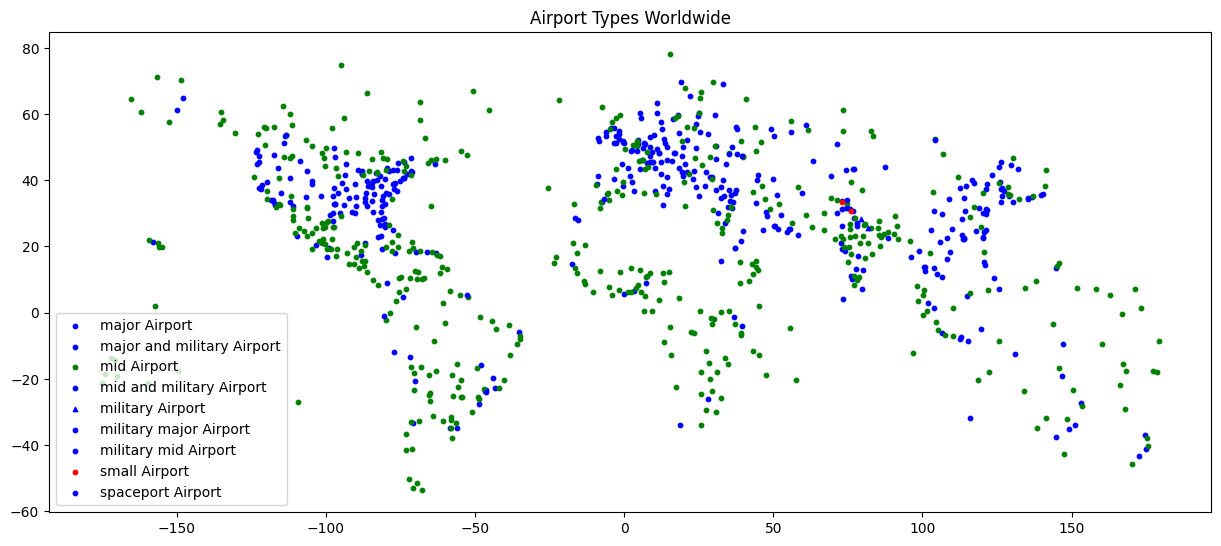

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

gdf = gpd.read_file("../data/ne_10m_airports.shp")

# print(gdf.head())  # View the first few rows of the dataframe
# print(gdf.columns)  # Print the column names



# Assuming 'gdf' is your GeoDataFrame
fig, ax = plt.subplots(figsize=(15, 10))

# Plot each category with a different color and marker
for dtype, data in gdf.groupby('type'):
    color = 'red' if dtype == 'small' else ('green' if dtype == 'mid' else 'blue')
    marker = '^' if dtype == 'military' else 'o'
    label = f"{dtype} Airport"
    data.plot(ax=ax, marker=marker, color=color, markersize=10, label=label)

ax.set_title('Airport Types Worldwide')
plt.legend()
plt.show()



In [4]:
import plotly.express as px

# Convert GeoDataFrame to DataFrame for Plotly
df = gdf.copy()
df['longitude'] = gdf.geometry.x
df['latitude'] = gdf.geometry.y

fig = px.scatter_geo(df,
                     lon='longitude',
                     lat='latitude',
                     color='type',  # Color points based on the airport type
                     hover_name='name',  # Display airport name when hovering
                     size='natlscale',  # Adjust point size
                     title='Worldwide Airport Distribution by Type')
fig.show()
